In [11]:
import sys
sys.path.append('/Users/deal/Desktop/BigHW/FCALC')

In [12]:
import pandas as pd
import fcalc
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [13]:
heart_stroke = pd.read_csv('/Users/deal/Desktop/BigHW/heart_stroke_binarized.csv')
breast_cancer = pd.read_csv('/Users/deal/Desktop/BigHW/breast_cancer_binarized.csv')
heart_failure = pd.read_csv('/Users/deal/Desktop/BigHW/heart_failure_binarized.csv')

In [17]:
df=pd.read_csv('/Users/deal/Desktop/BigHW/breast_cancer_ishodnik.csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,14.69,13.98,98.22,656.1,0.10310,1
1,13.17,18.66,85.98,534.6,0.11580,0
2,12.95,16.02,83.14,513.7,0.10050,1
3,18.31,18.58,118.60,1041.0,0.08588,0
4,15.13,29.81,96.71,719.5,0.08320,0
...,...,...,...,...,...,...
495,20.09,23.86,134.70,1247.0,0.10800,0
496,14.22,23.12,94.37,609.9,0.10750,0
497,12.31,16.52,79.19,470.9,0.09172,1
498,11.47,16.03,73.02,402.7,0.09076,1


# Рассмотрим датасет  brest_cancer

##  Проведем BinaryClassification (alpha-weak)

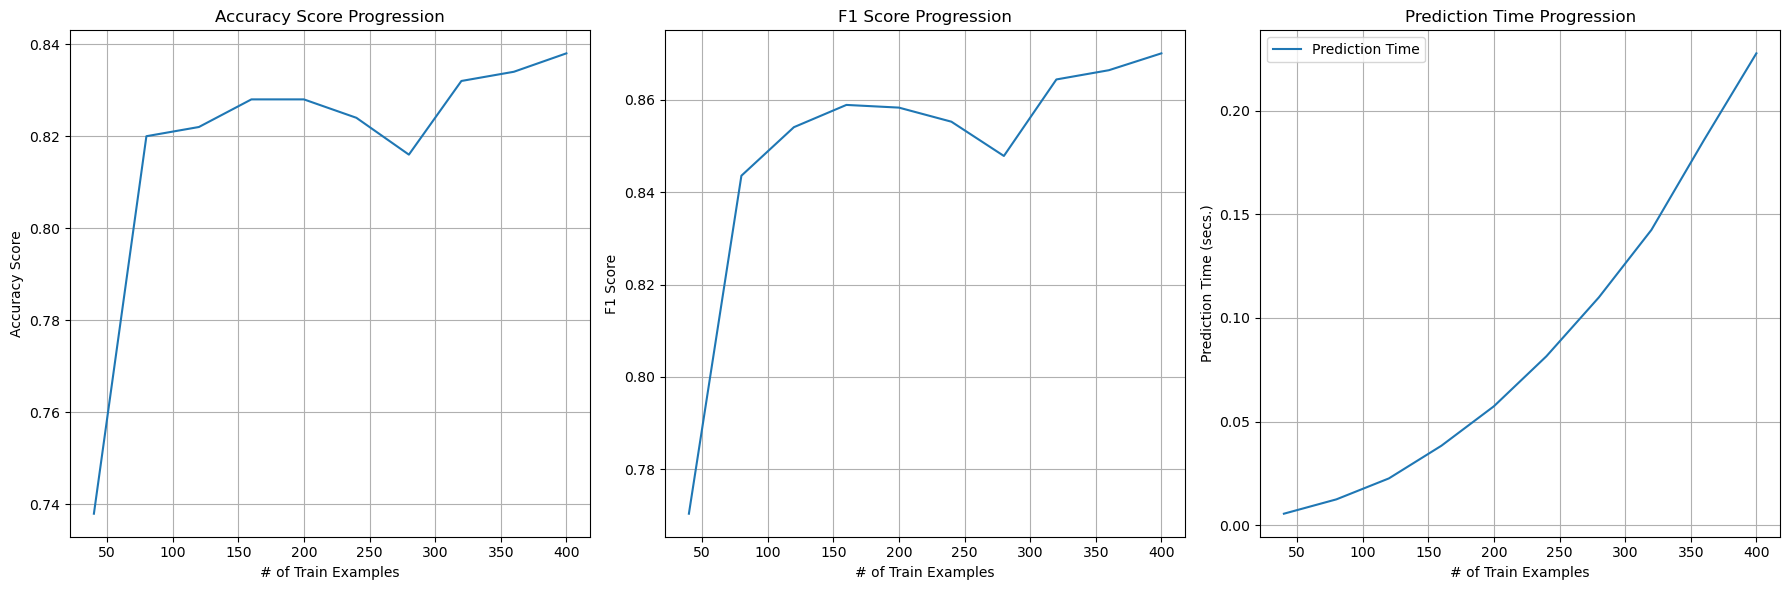

In [18]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
import fcalc
import matplotlib.pyplot as plt


df = pd.read_csv('/Users/deal/Desktop/BigHW/breast_cancer_binarized.csv')


X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


bc_weak_accuracy_scores = []
bc_weak_f1_scores = []
bc_weak_prediction_times = []
bc_weak_train_sizes = []


for frac in np.linspace(0.1, 1.0, 10):  # От 10% до 100% данных
    fold_accuracy = []
    fold_f1 = []
    fold_prediction_time = []
    avg_train_size = 0  

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        X_train_frac = X_train.sample(frac=frac, random_state=42)
        y_train_frac = y_train.loc[X_train_frac.index]

        # Обучение модели
        start_time = time.time()
        classifier = fcalc.classifier.BinarizedBinaryClassifier(X_train_frac.values, y_train_frac.to_numpy(),method="standard")
        classifier.predict(X_test.values)
        end_time = time.time()

        # Проверка и преобразование формата предсказаний
        predictions = np.array(classifier.predictions)
        if predictions.dtype != 'bool' or predictions.ndim != 1:
            predictions = (predictions > 0.5).astype('int')

        # Запись результатов для каждого фолда
        fold_accuracy.append(accuracy_score(y_test, predictions))
        fold_f1.append(f1_score(y_test, predictions))
        fold_prediction_time.append(end_time - start_time)

        # Учет размера обучающей выборки
        avg_train_size += len(X_train_frac)

    # Вычисление среднего размера обучающей выборки
    avg_train_size /= n_splits
    bc_weak_train_sizes.append(avg_train_size)

    # Усреднение результатов по фолдам
    bc_weak_accuracy_scores.append(np.mean(fold_accuracy))
    bc_weak_f1_scores.append(np.mean(fold_f1))
    bc_weak_prediction_times.append(np.mean(fold_prediction_time))

# Построение графиков
plt.figure(figsize=(18, 6))

# График точности
plt.subplot(1, 3, 1)
plt.plot(bc_weak_train_sizes, bc_weak_accuracy_scores, label='Accuracy')
plt.xlabel('# of Train Examples')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Progression')
plt.grid(True)

# График F1-меры
plt.subplot(1, 3, 2)
plt.plot(bc_weak_train_sizes, bc_weak_f1_scores, label='F1 Score')
plt.xlabel('# of Train Examples')
plt.ylabel('F1 Score')
plt.title('F1 Score Progression')
plt.grid(True)

# График времени предсказания
plt.subplot(1, 3, 3)
plt.plot(bc_weak_train_sizes, bc_weak_prediction_times, label='Prediction Time')
plt.xlabel('# of Train Examples')
plt.ylabel('Prediction Time (secs.)')
plt.title('Prediction Time Progression')
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()

# BinaryClassification (alpha_weak_SUPPORT)

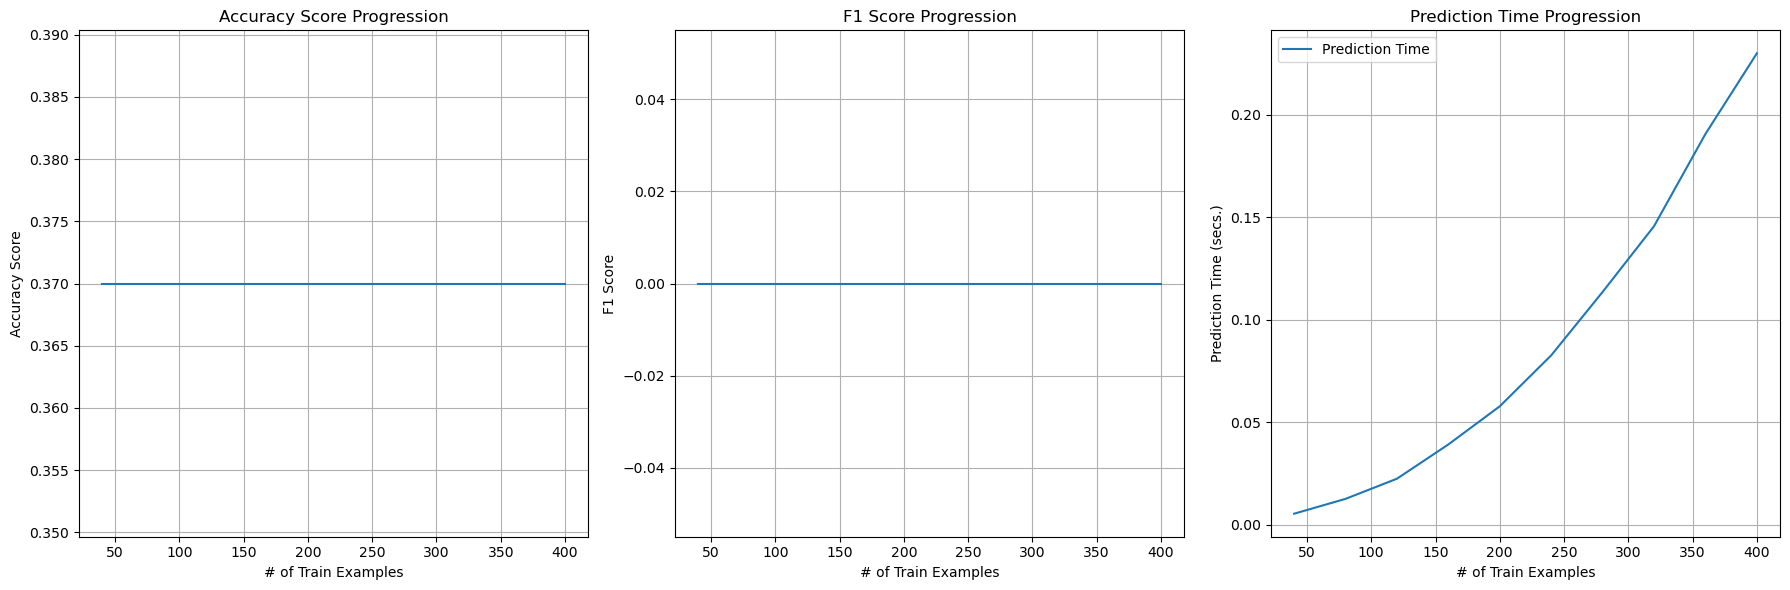

In [19]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
import fcalc
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('/Users/deal/Desktop/BigHW/breast_cancer_binarized.csv')
# Выбор признаков и целевой переменной
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Определение параметров кросс-валидации
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Инициализация списков для хранения результатов
bc_sup_accuracy_scores = []
bc_sup_f1_scores = []
bc_sup_prediction_times = []
bc_sup_train_sizes = []

# Цикл по различным размерам обучающей выборки
for frac in np.linspace(0.1, 1.0, 10):  # От 10% до 100% данных
    fold_accuracy = []
    fold_f1 = []
    fold_prediction_time = []
    avg_train_size = 0  # Средний размер обучающей выборки

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        X_train_frac = X_train.sample(frac=frac, random_state=42)
        y_train_frac = y_train.loc[X_train_frac.index]

        # Обучение модели
        start_time = time.time()
        classifier = fcalc.classifier.BinarizedBinaryClassifier(X_train_frac.values, y_train_frac.to_numpy(), method="standard-support")
        classifier.predict(X_test.values)
        end_time = time.time()

        # Проверка и преобразование формата предсказаний
        predictions = np.array(classifier.predictions)
        if predictions.dtype != 'bool' or predictions.ndim != 1:
            predictions = (predictions > 0.5).astype('int')

        # Запись результатов для каждого фолда
        fold_accuracy.append(accuracy_score(y_test, predictions))
        fold_f1.append(f1_score(y_test, predictions))
        fold_prediction_time.append(end_time - start_time)

        # Учет размера обучающей выборки
        avg_train_size += len(X_train_frac)

    # Вычисление среднего размера обучающей выборки
    avg_train_size /= n_splits
    bc_sup_train_sizes.append(avg_train_size)

    # Усреднение результатов по фолдам
    bc_sup_accuracy_scores.append(np.mean(fold_accuracy))
    bc_sup_f1_scores.append(np.mean(fold_f1))
    bc_sup_prediction_times.append(np.mean(fold_prediction_time))

# Построение графиков
plt.figure(figsize=(18, 6))

# График точности
plt.subplot(1, 3, 1)
plt.plot(bc_sup_train_sizes, bc_sup_accuracy_scores, label='Accuracy')
plt.xlabel('# of Train Examples')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Progression')
plt.grid(True)

# График F1-меры
plt.subplot(1, 3, 2)
plt.plot(bc_sup_train_sizes, bc_sup_f1_scores, label='F1 Score')
plt.xlabel('# of Train Examples')
plt.ylabel('F1 Score')
plt.title('F1 Score Progression')
plt.grid(True)

# График времени предсказания
plt.subplot(1, 3, 3)
plt.plot(bc_sup_train_sizes, bc_sup_prediction_times, label='Prediction Time')
plt.xlabel('# of Train Examples')
plt.ylabel('Prediction Time (secs.)')
plt.title('Prediction Time Progression')
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()

# BinaryClassification (ratio_SUPPORT)

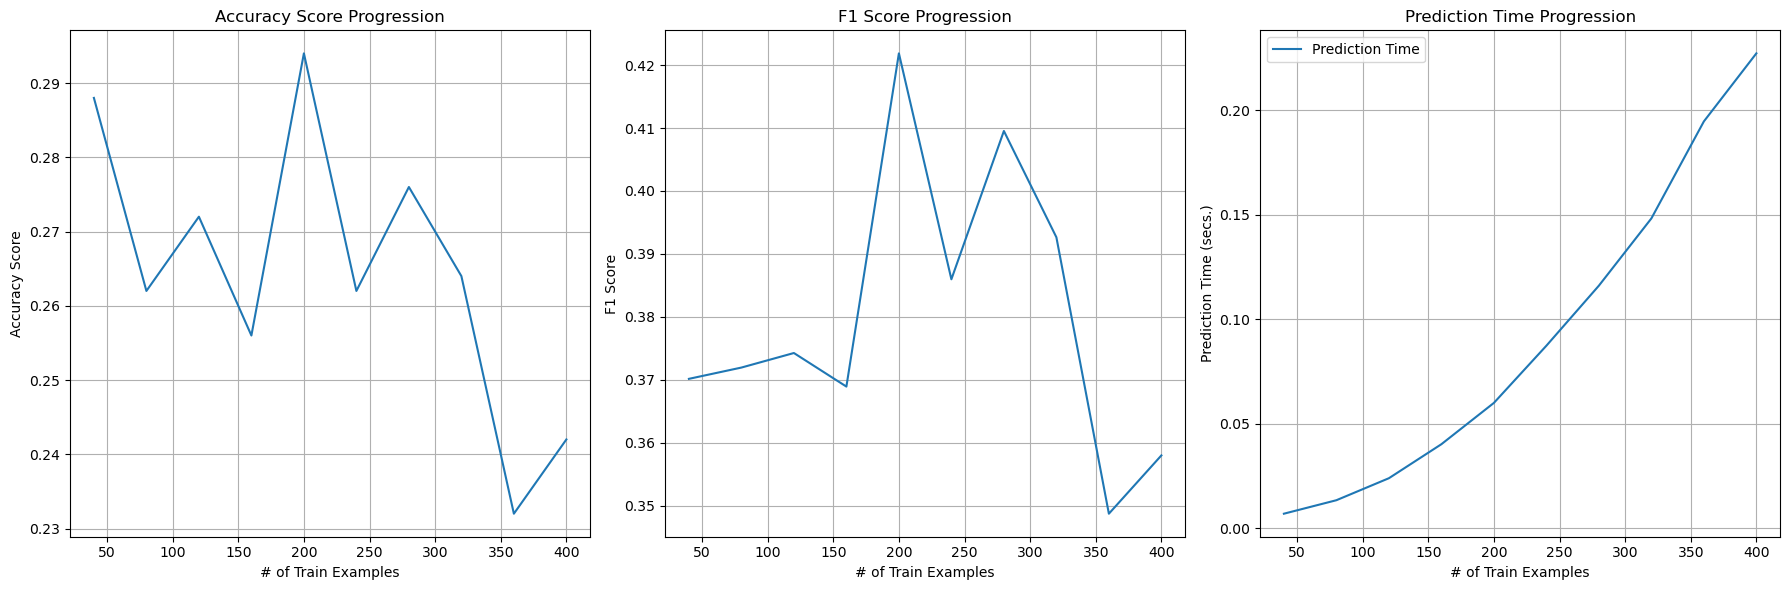

In [20]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
import fcalc
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('/Users/deal/Desktop/BigHW/breast_cancer_binarized.csv')

# Выбор признаков и целевой переменной
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Определение параметров кросс-валидации
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Инициализация списков для хранения результатов
bc_rat_accuracy_scores = []
bc_rat_f1_scores = []
bc_rat_prediction_times = []
bc_rat_train_sizes = []

# Цикл по различным размерам обучающей выборки
for frac in np.linspace(0.1, 1.0, 10):  # От 10% до 100% данных
    fold_accuracy = []
    fold_f1 = []
    fold_prediction_time = []
    avg_train_size = 0  # Средний размер обучающей выборки

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        X_train_frac = X_train.sample(frac=frac, random_state=42)
        y_train_frac = y_train.loc[X_train_frac.index]

        # Обучение модели
        start_time = time.time()
        classifier = fcalc.classifier.BinarizedBinaryClassifier(X_train_frac.values, y_train_frac.to_numpy(), method = "ratio-support")
        classifier.predict(X_test.values)
        end_time = time.time()

        # Проверка и преобразование формата предсказаний
        predictions = np.array(classifier.predictions)
        if predictions.dtype != 'bool' or predictions.ndim != 1:
            predictions = (predictions > 0.5).astype('int')

        # Запись результатов для каждого фолда
        fold_accuracy.append(accuracy_score(y_test, predictions))
        fold_f1.append(f1_score(y_test, predictions))
        fold_prediction_time.append(end_time - start_time)

        # Учет размера обучающей выборки
        avg_train_size += len(X_train_frac)

    # Вычисление среднего размера обучающей выборки
    avg_train_size /= n_splits
    bc_rat_train_sizes.append(avg_train_size)

    # Усреднение результатов по фолдам
    bc_rat_accuracy_scores.append(np.mean(fold_accuracy))
    bc_rat_f1_scores.append(np.mean(fold_f1))
    bc_rat_prediction_times.append(np.mean(fold_prediction_time))

# Построение графиков
plt.figure(figsize=(18, 6))

# График точности
plt.subplot(1, 3, 1)
plt.plot(bc_rat_train_sizes, bc_rat_accuracy_scores, label='Accuracy')
plt.xlabel('# of Train Examples')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Progression')
plt.grid(True)

# График F1-меры
plt.subplot(1, 3, 2)
plt.plot(bc_rat_train_sizes, bc_rat_f1_scores, label='F1 Score')
plt.xlabel('# of Train Examples')
plt.ylabel('F1 Score')
plt.title('F1 Score Progression')
plt.grid(True)

# График времени предсказания
plt.subplot(1, 3, 3)
plt.plot(bc_rat_train_sizes, bc_rat_prediction_times, label='Prediction Time')
plt.xlabel('# of Train Examples')
plt.ylabel('Prediction Time (secs.)')
plt.title('Prediction Time Progression')
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()

## Pattern structure (alpha-weak)

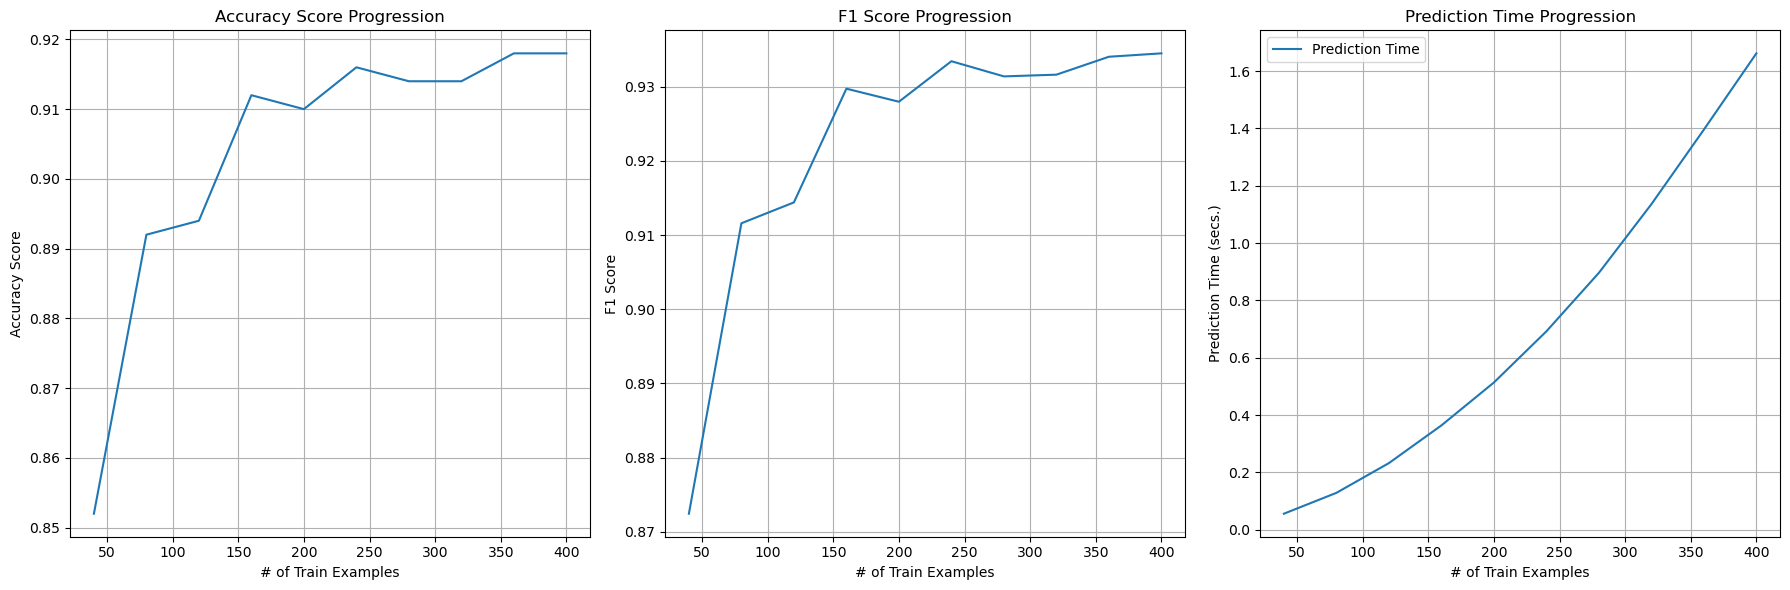

In [45]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
import fcalc
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('/Users/deal/Desktop/BigHW/breast_cancer_ishodnik.csv')

# Выбор признаков и целевой переменной
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Определение категориальных признаков
categorical_indices = np.array([])

# Инициализация списков для хранения результатов
ps_weak_accuracy_scores = []
ps_weak_f1_scores = []
ps_weak_prediction_times = []
ps_weak_train_sizes = []

# Определение параметров кросс-валидации
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Цикл по различным размерам обучающей выборки
for frac in np.linspace(0.1, 1.0, 10):  # От 10% до 100% данных
    fold_accuracy = []
    fold_f1 = []
    fold_prediction_time = []
    avg_train_size = 0  # Средний размер обучающей выборки

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        X_train_frac = X_train.sample(frac=frac, random_state=42)
        y_train_frac = y_train.loc[X_train_frac.index]

        # Обучение модели
        start_time = time.time()
        classifier = fcalc.classifier.PatternBinaryClassifier(X_train_frac.values, y_train_frac.to_numpy(), 
                                                              categorical=categorical_indices)
        classifier.predict(X_test.values)
        end_time = time.time()

        # Проверка и преобразование формата предсказаний
        predictions = np.array(classifier.predictions)
        if predictions.dtype != 'bool' or predictions.ndim != 1:
            predictions = (predictions > 0.5).astype('int')

        # Запись результатов для каждого фолда
        fold_accuracy.append(accuracy_score(y_test, predictions))
        fold_f1.append(f1_score(y_test, predictions))
        fold_prediction_time.append(end_time - start_time)

        # Учет размера обучающей выборки
        avg_train_size += len(X_train_frac)

    # Вычисление среднего размера обучающей выборки
    avg_train_size /= n_splits
    ps_weak_train_sizes.append(avg_train_size)

    # Усреднение результатов по фолдам
    ps_weak_accuracy_scores.append(np.mean(fold_accuracy))
    ps_weak_f1_scores.append(np.mean(fold_f1))
    ps_weak_prediction_times.append(np.mean(fold_prediction_time))

# Построение графиков
plt.figure(figsize=(18, 6))

# График точности
plt.subplot(1, 3, 1)
plt.plot(ps_weak_train_sizes, ps_weak_accuracy_scores, label='Accuracy')
plt.xlabel('# of Train Examples')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Progression')
plt.grid(True)

# График F1-меры
plt.subplot(1, 3, 2)
plt.plot(ps_weak_train_sizes, ps_weak_f1_scores, label='F1 Score')
plt.xlabel('# of Train Examples')
plt.ylabel('F1 Score')
plt.title('F1 Score Progression')
plt.grid(True)

# График времени предсказания
plt.subplot(1, 3, 3)
plt.plot(ps_weak_train_sizes, ps_weak_prediction_times, label='Prediction Time')
plt.xlabel('# of Train Examples')
plt.ylabel('Prediction Time (secs.)')
plt.title('Prediction Time Progression')
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()

## Pattern structure (alpha_weak_SUPPORT)

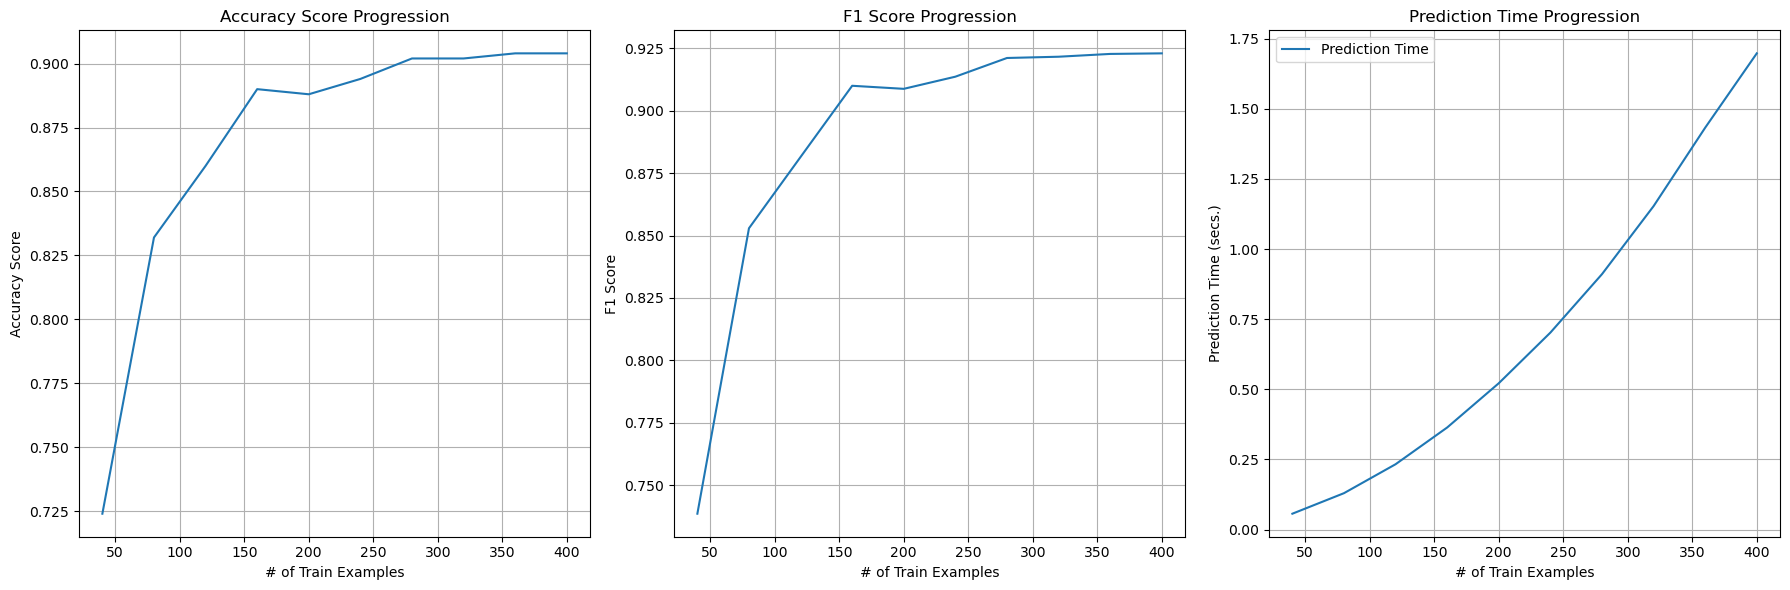

In [46]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
import fcalc
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('/Users/deal/Desktop/BigHW/breast_cancer_ishodnik.csv')

# Выбор признаков и целевой переменной
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Определение категориальных признаков
categorical_indices = np.array([])

# Инициализация списков для хранения результатов
ps_sup_accuracy_scores = []
ps_sup_f1_scores = []
ps_sup_prediction_times = []
ps_sup_train_sizes = []

# Определение параметров кросс-валидации
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Цикл по различным размерам обучающей выборки
for frac in np.linspace(0.1, 1.0, 10):  # От 10% до 100% данных
    fold_accuracy = []
    fold_f1 = []
    fold_prediction_time = []
    avg_train_size = 0  # Средний размер обучающей выборки

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        X_train_frac = X_train.sample(frac=frac, random_state=42)
        y_train_frac = y_train.loc[X_train_frac.index]

        # Обучение модели
        start_time = time.time()
        classifier = fcalc.classifier.PatternBinaryClassifier(X_train_frac.values, y_train_frac.to_numpy(), 
                                                              categorical=categorical_indices, method="standard-support")
        classifier.predict(X_test.values)
        end_time = time.time()

        # Проверка и преобразование формата предсказаний
        predictions = np.array(classifier.predictions)
        if predictions.dtype != 'bool' or predictions.ndim != 1:
            predictions = (predictions > 0.5).astype('int')

        # Запись результатов для каждого фолда
        fold_accuracy.append(accuracy_score(y_test, predictions))
        fold_f1.append(f1_score(y_test, predictions))
        fold_prediction_time.append(end_time - start_time)

        # Учет размера обучающей выборки
        avg_train_size += len(X_train_frac)

    # Вычисление среднего размера обучающей выборки
    avg_train_size /= n_splits
    ps_sup_train_sizes.append(avg_train_size)

    # Усреднение результатов по фолдам
    ps_sup_accuracy_scores.append(np.mean(fold_accuracy))
    ps_sup_f1_scores.append(np.mean(fold_f1))
    ps_sup_prediction_times.append(np.mean(fold_prediction_time))

# Построение графиков
plt.figure(figsize=(18, 6))

# График точности
plt.subplot(1, 3, 1)
plt.plot(ps_sup_train_sizes, ps_sup_accuracy_scores, label='Accuracy')
plt.xlabel('# of Train Examples')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Progression')
plt.grid(True)

# График F1-меры
plt.subplot(1, 3, 2)
plt.plot(ps_sup_train_sizes, ps_sup_f1_scores, label='F1 Score')
plt.xlabel('# of Train Examples')
plt.ylabel('F1 Score')
plt.title('F1 Score Progression')
plt.grid(True)

# График времени предсказания
plt.subplot(1, 3, 3)
plt.plot(ps_sup_train_sizes, ps_sup_prediction_times, label='Prediction Time')
plt.xlabel('# of Train Examples')
plt.ylabel('Prediction Time (secs.)')
plt.title('Prediction Time Progression')
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()

## Pattern structure (ratio_SUPPORT)

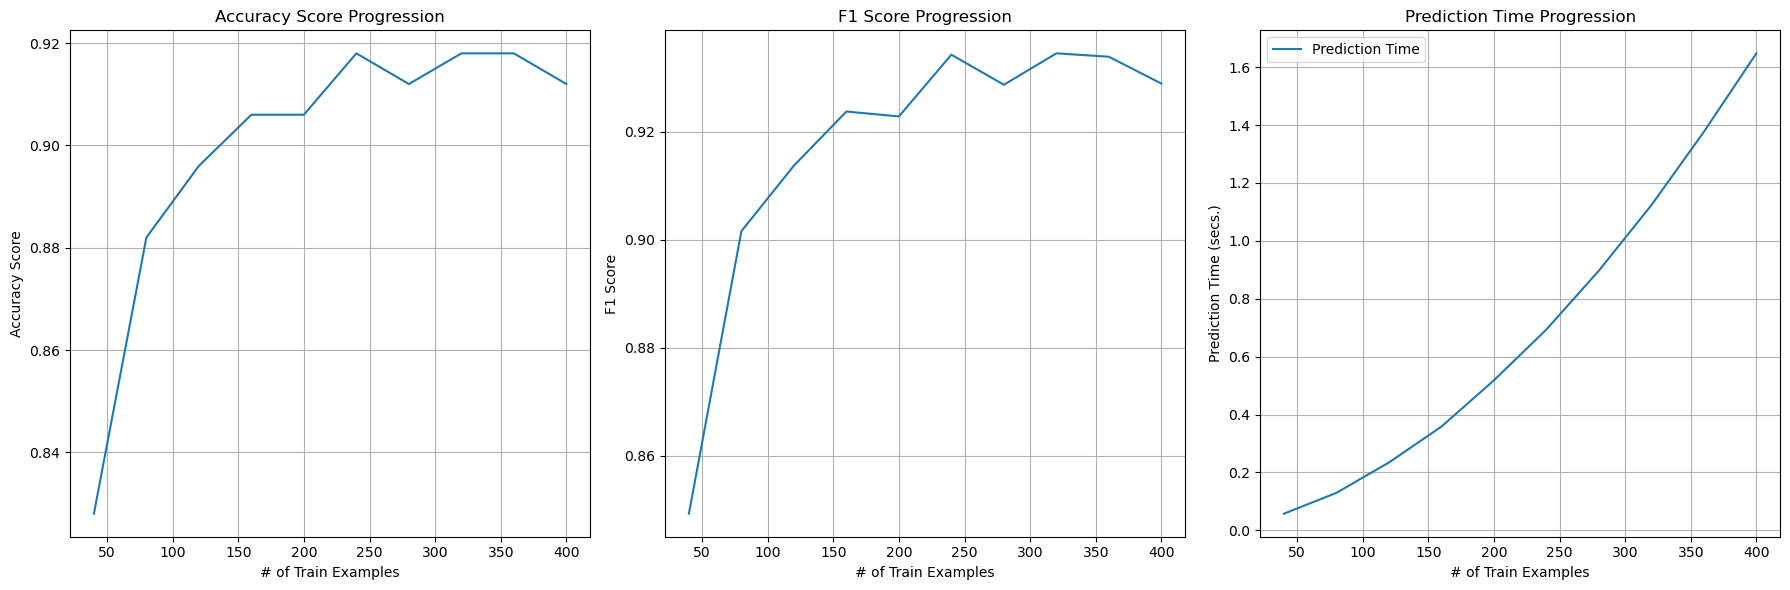

In [44]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
import fcalc
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('/Users/deal/Desktop/BigHW/breast_cancer_ishodnik.csv')

# Выбор признаков и целевой переменной
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Определение категориальных признаков
categorical_indices = np.array([])

# Инициализация списков для хранения результатов
ps_rat_accuracy_scores = []
ps_rat_f1_scores = []
ps_rat_prediction_times = []
ps_rat_train_sizes = []

# Определение параметров кросс-валидации
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Цикл по различным размерам обучающей выборки
for frac in np.linspace(0.1, 1.0, 10):  # От 10% до 100% данных
    fold_accuracy = []
    fold_f1 = []
    fold_prediction_time = []
    avg_train_size = 0  # Средний размер обучающей выборки

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        X_train_frac = X_train.sample(frac=frac, random_state=42)
        y_train_frac = y_train.loc[X_train_frac.index]

        # Обучение модели
        start_time = time.time()
        classifier = fcalc.classifier.PatternBinaryClassifier(X_train_frac.values, y_train_frac.to_numpy(), 
                                                              categorical=categorical_indices, method="ratio-support")
        classifier.predict(X_test.values)
        end_time = time.time()

        # Проверка и преобразование формата предсказаний
        predictions = np.array(classifier.predictions)
        if predictions.dtype != 'bool' or predictions.ndim != 1:
            predictions = (predictions > 0.5).astype('int')

        # Запись результатов для каждого фолда
        fold_accuracy.append(accuracy_score(y_test, predictions))
        fold_f1.append(f1_score(y_test, predictions))
        fold_prediction_time.append(end_time - start_time)

        # Учет размера обучающей выборки
        avg_train_size += len(X_train_frac)

    # Вычисление среднего размера обучающей выборки
    avg_train_size /= n_splits
    ps_rat_train_sizes.append(avg_train_size)

    # Усреднение результатов по фолдам
    ps_rat_accuracy_scores.append(np.mean(fold_accuracy))
    ps_rat_f1_scores.append(np.mean(fold_f1))
    ps_rat_prediction_times.append(np.mean(fold_prediction_time))

# Построение графиков
plt.figure(figsize=(18, 6))

# График точности
plt.subplot(1, 3, 1)
plt.plot(ps_rat_train_sizes, ps_rat_accuracy_scores, label='Accuracy')
plt.xlabel('# of Train Examples')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Progression')
plt.grid(True)

# График F1-меры
plt.subplot(1, 3, 2)
plt.plot(ps_rat_train_sizes, ps_rat_f1_scores, label='F1 Score')
plt.xlabel('# of Train Examples')
plt.ylabel('F1 Score')
plt.title('F1 Score Progression')
plt.grid(True)

# График времени предсказания
plt.subplot(1, 3, 3)
plt.plot(ps_rat_train_sizes, ps_rat_prediction_times, label='Prediction Time')
plt.xlabel('# of Train Examples')
plt.ylabel('Prediction Time (secs.)')
plt.title('Prediction Time Progression')
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()

# Подбир гиперпараметров для decision tree

In [25]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score


df = pd.read_csv('/Users/deal/Desktop/BigHW/breast_cancer_ishodnik.csv') 


X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10)
}


dt = DecisionTreeClassifier()

# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring=make_scorer(accuracy_score), cv=5)

# Поиск лучших гиперпараметров
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)},
             scoring=make_scorer(accuracy_score))

In [26]:
print("Лучшие гиперпараметры:", grid_search.best_params_)

Лучшие гиперпараметры: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}


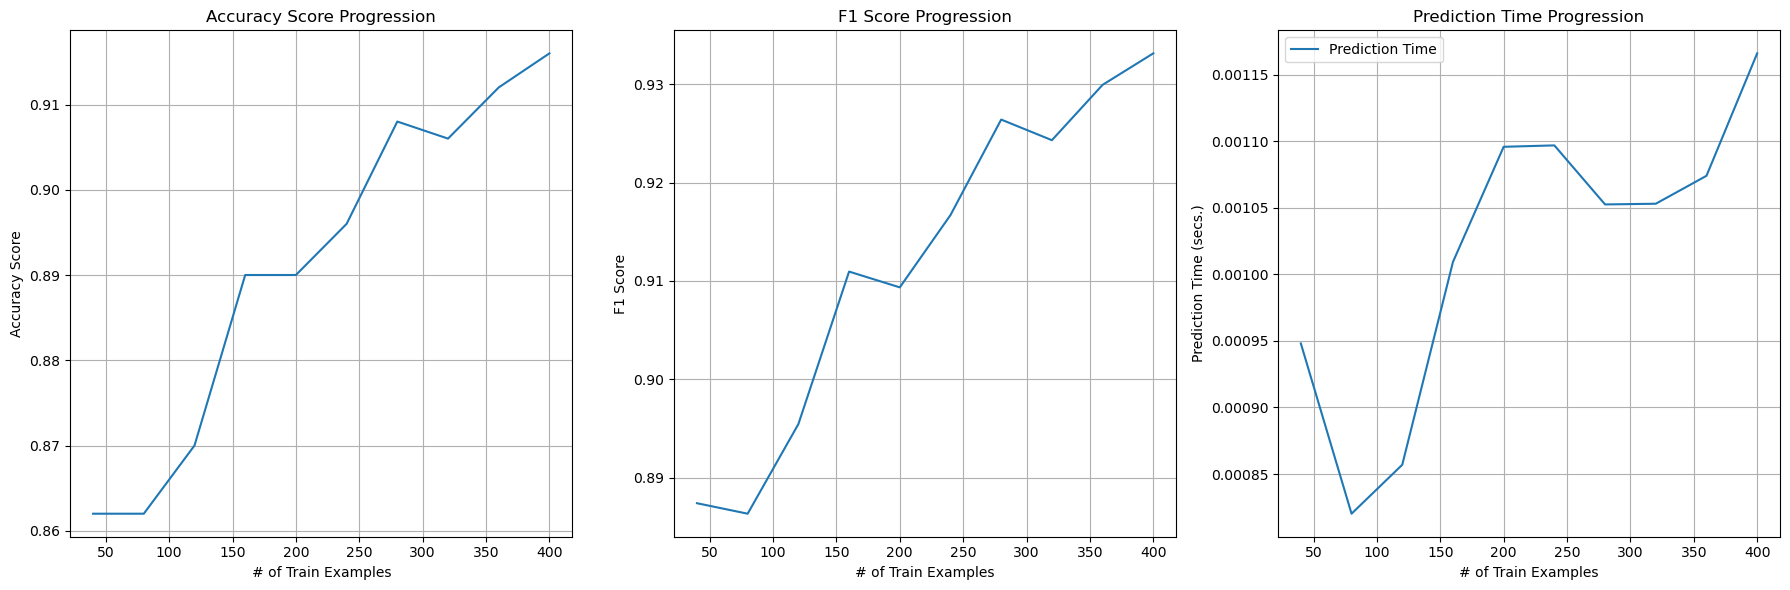

In [27]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('/Users/deal/Desktop/BigHW/breast_cancer_ishodnik.csv') # Укажите здесь правильный путь к файлу

# Выбор признаков и целевой переменной
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Определение параметров кросс-валидации
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Инициализация списков для хранения результатов
dt_accuracy_scores = []
dt_f1_scores = []
dt_prediction_times = []
dt_train_sizes = []

# Цикл по различным размерам обучающей выборки
for frac in np.linspace(0.1, 1.0, 10):
    fold_accuracy = []
    fold_f1 = []
    fold_prediction_time = []
    avg_train_size = 0

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Выборка части обучающих данных
        X_train_frac = X_train.sample(frac=frac, random_state=42)
        y_train_frac = y_train.loc[X_train_frac.index]

        # Обучение модели дерева решений с лучшими гиперпараметрами
        dt = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=5, min_samples_split=2)
        start_time = time.time()
        dt.fit(X_train_frac, y_train_frac)
        predictions = dt.predict(X_test)
        end_time = time.time()

        # Запись результатов для каждого фолда
        fold_accuracy.append(accuracy_score(y_test, predictions))
        fold_f1.append(f1_score(y_test, predictions))
        fold_prediction_time.append(end_time - start_time)

        avg_train_size += len(X_train_frac)

    # Усреднение результатов по фолдам
    avg_train_size /= n_splits
    dt_train_sizes.append(avg_train_size)
    dt_accuracy_scores.append(np.mean(fold_accuracy))
    dt_f1_scores.append(np.mean(fold_f1))
    dt_prediction_times.append(np.mean(fold_prediction_time))

# Построение графиков
plt.figure(figsize=(18, 6))

# График точности
plt.subplot(1, 3, 1)
plt.plot(dt_train_sizes, dt_accuracy_scores, label='Accuracy')
plt.xlabel('# of Train Examples')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Progression')
plt.grid(True)

# График F1-меры
plt.subplot(1, 3, 2)
plt.plot(dt_train_sizes, dt_f1_scores, label='F1 Score')
plt.xlabel('# of Train Examples')
plt.ylabel('F1 Score')
plt.title('F1 Score Progression')
plt.grid(True)

# График времени предсказания
plt.subplot(1, 3, 3)
plt.plot(dt_train_sizes, dt_prediction_times, label='Prediction Time')
plt.xlabel('# of Train Examples')
plt.ylabel('Prediction Time (secs.)')
plt.title('Prediction Time Progression')
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()

# RandomForest

In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Загрузка данных
df = pd.read_csv('/Users/deal/Desktop/BigHW/breast_cancer_ishodnik.csv') # Укажите здесь правильный путь к файлу

# Выбор признаков и целевой переменной
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Определение параметров для поиска
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # количество деревьев
    'max_depth': [None, 10, 20, 30, 40],  # максимальная глубина дерева
    'min_samples_split': [2, 5, 10],      # минимальное количество образцов для разделения узла
    'min_samples_leaf': [1, 2, 4,8,10]         # минимальное количество образцов в листе
}

# Создание модели случайного леса
rf = RandomForestClassifier()

# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=make_scorer(accuracy_score), cv=5)

# Поиск лучших гиперпараметров
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4, 8, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring=make_scorer(accuracy_score))

In [29]:
# Вывод лучших параметров
print("Лучшие гиперпараметры:", grid_search.best_params_)

Лучшие гиперпараметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


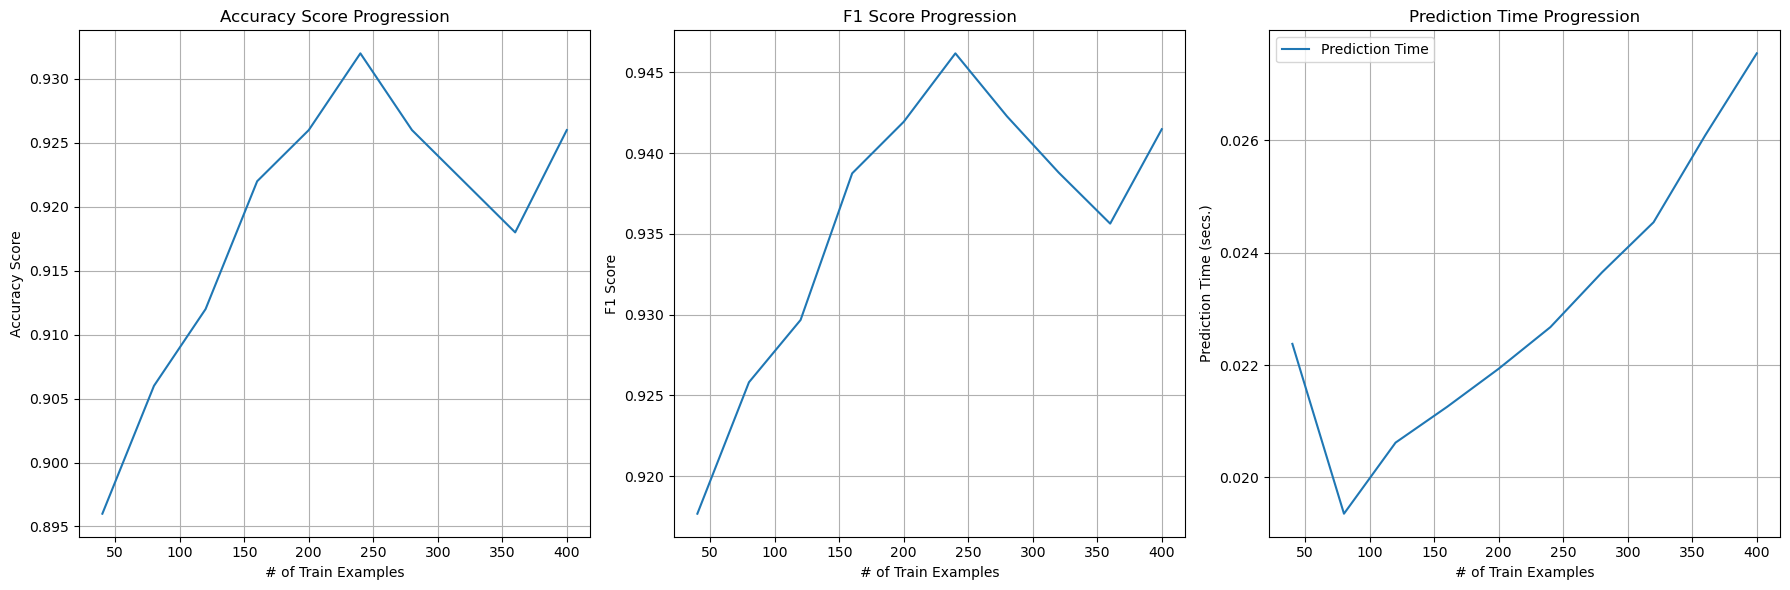

In [31]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('/Users/deal/Desktop/BigHW/breast_cancer_ishodnik.csv') # Укажите здесь правильный путь к файлу

# Выбор признаков и целевой переменной
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Определение параметров кросс-валидации
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Инициализация списков для хранения результатов
rf_accuracy_scores = []
rf_f1_scores = []
rf_prediction_times = []
rf_train_sizes = []

# Цикл по различным размерам обучающей выборки
for frac in np.linspace(0.1, 1.0, 10):
    fold_accuracy = []
    fold_f1 = []
    fold_prediction_time = []
    avg_train_size = 0

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Выборка части обучающих данных
        X_train_frac = X_train.sample(frac=frac, random_state=42)
        y_train_frac = y_train.loc[X_train_frac.index]

        # Обучение модели случайного леса с лучшими гиперпараметрами
        rf = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50)
        start_time = time.time()
        rf.fit(X_train_frac, y_train_frac)
        predictions = rf.predict(X_test)
        end_time = time.time()

        # Запись результатов для каждого фолда
        fold_accuracy.append(accuracy_score(y_test, predictions))
        fold_f1.append(f1_score(y_test, predictions))
        fold_prediction_time.append(end_time - start_time)

        avg_train_size += len(X_train_frac)

    # Усреднение результатов по фолдам
    avg_train_size /= n_splits
    rf_train_sizes.append(avg_train_size)
    rf_accuracy_scores.append(np.mean(fold_accuracy))
    rf_f1_scores.append(np.mean(fold_f1))
    rf_prediction_times.append(np.mean(fold_prediction_time))

# Построение графиков
plt.figure(figsize=(18, 6))

# График точности
plt.subplot(1, 3, 1)
plt.plot(rf_train_sizes, rf_accuracy_scores, label='Accuracy')
plt.xlabel('# of Train Examples')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Progression')
plt.grid(True)

# График F1-меры
plt.subplot(1, 3, 2)
plt.plot(rf_train_sizes, rf_f1_scores, label='F1 Score')
plt.xlabel('# of Train Examples')
plt.ylabel('F1 Score')
plt.title('F1 Score Progression')
plt.grid(True)

# График времени предсказания
plt.subplot(1, 3, 3)
plt.plot(rf_train_sizes, rf_prediction_times, label='Prediction Time')
plt.xlabel('# of Train Examples')
plt.ylabel('Prediction Time (secs.)')
plt.title('Prediction Time Progression')
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()


# XBoost

import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score


# Загрузка данных
df = pd.read_csv('/Users/deal/Desktop/BigHW/breast_cancer_ishodnik.csv') # Укажите правильный путь к файлу

# Выбор признаков и целевой переменной
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Определение параметров для поиска
param_grid = {
    'max_depth': [3, 9],
    'learning_rate': [0.01, 0.3],
    'n_estimators': [50, 200],
    'gamma': [0, 0.5],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Создание модели XGBoost
xgb = XGBClassifier(eval_metric='logloss')

# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring=make_scorer(accuracy_score), cv=5, verbose=1)

# Поиск лучших гиперпараметров
grid_search.fit(X, y)


# Вывод лучших параметров
print("Лучшие гиперпараметры:", grid_search.best_params_)





Лучшие гиперпараметры: {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1}




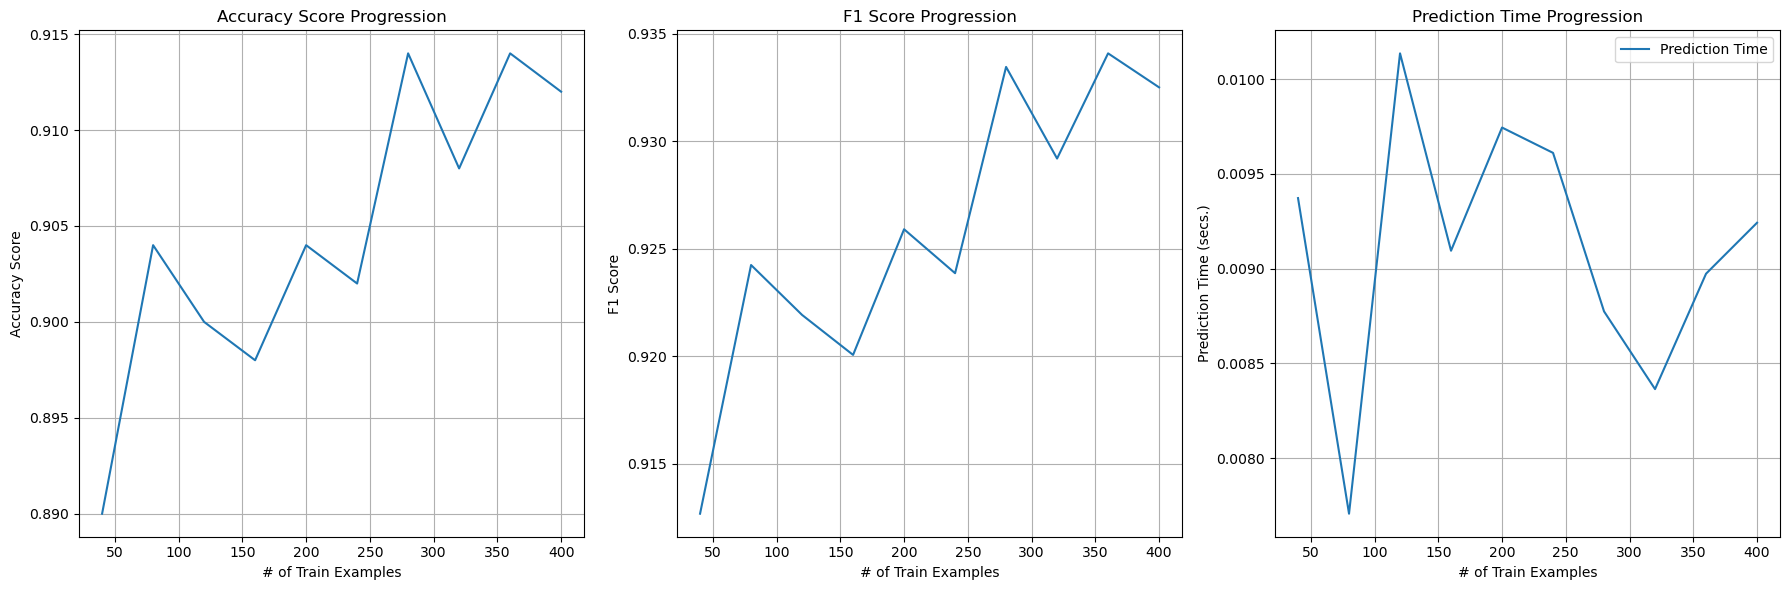

In [33]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('/Users/deal/Desktop/BigHW/breast_cancer_ishodnik.csv') # Укажите правильный путь к файлу

# Выбор признаков и целевой переменной
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Определение параметров кросс-валидации
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Инициализация списков для хранения результатов
xgb_accuracy_scores = []
xgb_f1_scores = []
xgb_prediction_times = []
xgb_train_sizes = []

# Цикл по различным размерам обучающей выборки
for frac in np.linspace(0.1, 1.0, 10):
    fold_accuracy = []
    fold_f1 = []
    fold_prediction_time = []
    avg_train_size = 0

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Выборка части обучающих данных
        X_train_frac = X_train.sample(frac=frac, random_state=42)
        y_train_frac = y_train.loc[X_train_frac.index]

        # Обучение модели XGBoost с лучшими гиперпараметрами
        xgb = XGBClassifier(
            colsample_bytree=0.8,
            gamma=0.5,
            learning_rate=0.01,
            max_depth=3,
            n_estimators=50,
            subsample=1,
            eval_metric='logloss'
        )
        start_time = time.time()
        xgb.fit(X_train_frac, y_train_frac)
        predictions = xgb.predict(X_test)
        end_time = time.time()

        # Запись результатов для каждого фолда
        fold_accuracy.append(accuracy_score(y_test, predictions))
        fold_f1.append(f1_score(y_test, predictions))
        fold_prediction_time.append(end_time - start_time)

        avg_train_size += len(X_train_frac)

    # Усреднение результатов по фолдам
    avg_train_size /= n_splits
    xgb_train_sizes.append(avg_train_size)
    xgb_accuracy_scores.append(np.mean(fold_accuracy))
    xgb_f1_scores.append(np.mean(fold_f1))
    xgb_prediction_times.append(np.mean(fold_prediction_time))

# Построение графиков
plt.figure(figsize=(18, 6))

# График точности
plt.subplot(1, 3, 1)
plt.plot(xgb_train_sizes, xgb_accuracy_scores, label='Accuracy')
plt.xlabel('# of Train Examples')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Progression')
plt.grid(True)

# График F1-меры
plt.subplot(1, 3, 2)
plt.plot(xgb_train_sizes, xgb_f1_scores, label='F1 Score')
plt.xlabel('# of Train Examples')
plt.ylabel('F1 Score')
plt.title('F1 Score Progression')
plt.grid(True)

# График времени предсказания
plt.subplot(1, 3, 3)
plt.plot(xgb_train_sizes, xgb_prediction_times, label='Prediction Time')
plt.xlabel('# of Train Examples')
plt.ylabel('Prediction Time (secs.)')
plt.title('Prediction Time Progression')
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()

# Catboost

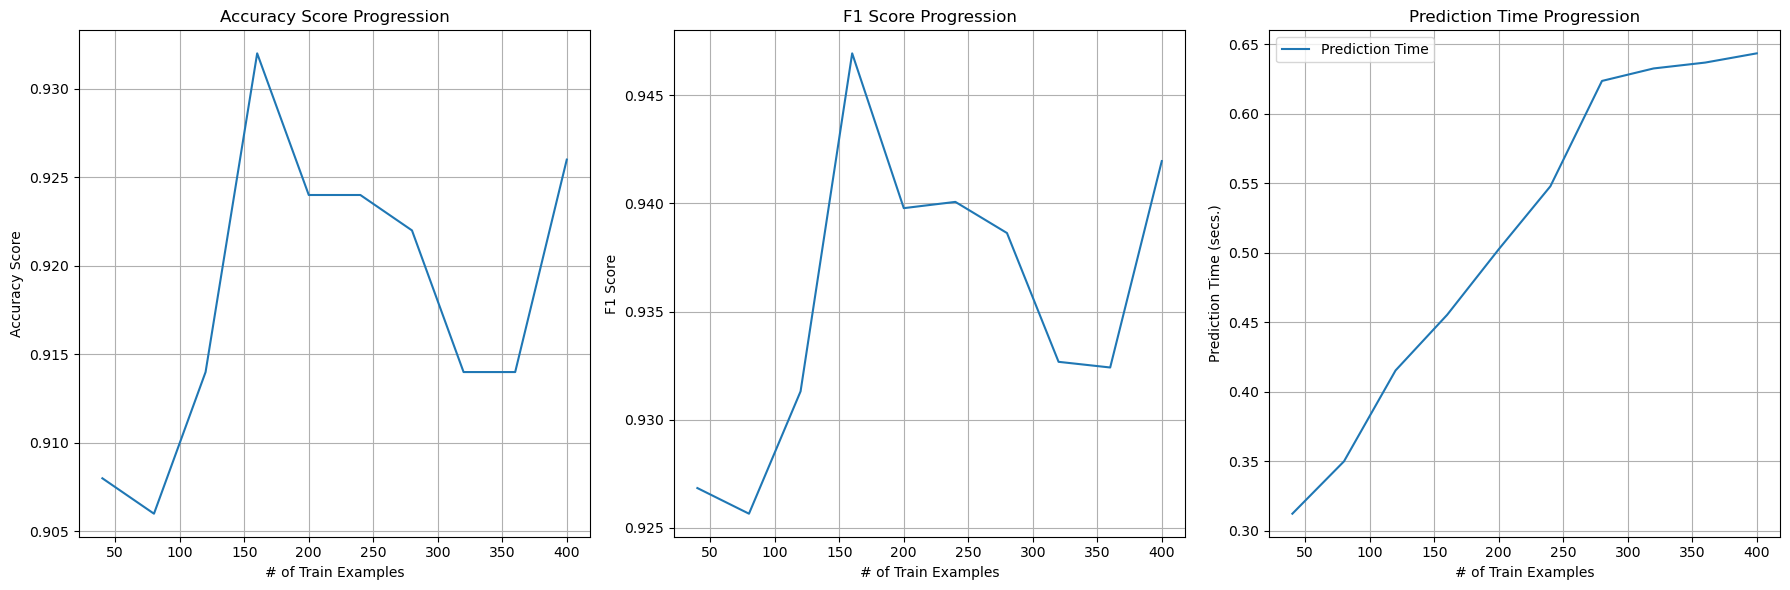

In [34]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('/Users/deal/Desktop/BigHW/breast_cancer_ishodnik.csv') # Укажите правильный путь к файлу

# Выбор признаков и целевой переменной
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Определение параметров кросс-валидации
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Инициализация списков для хранения результатов
cb_accuracy_scores = []
cb_f1_scores = []
cb_prediction_times = []
cb_train_sizes = []

# Цикл по различным размерам обучающей выборки
for frac in np.linspace(0.1, 1.0, 10):
    fold_accuracy = []
    fold_f1 = []
    fold_prediction_time = []
    avg_train_size = 0

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Выборка части обучающих данных
        X_train_frac = X_train.sample(frac=frac, random_state=42)
        y_train_frac = y_train.loc[X_train_frac.index]

        # Создание и обучение модели CatBoost
        model = CatBoostClassifier(verbose=0)
        start_time = time.time()
        model.fit(X_train_frac, y_train_frac)
        predictions = model.predict(X_test)
        end_time = time.time()

        # Запись результатов для каждого фолда
        fold_accuracy.append(accuracy_score(y_test, predictions))
        fold_f1.append(f1_score(y_test, predictions))
        fold_prediction_time.append(end_time - start_time)

        avg_train_size += len(X_train_frac)

    # Усреднение результатов по фолдам
    avg_train_size /= n_splits
    cb_train_sizes.append(avg_train_size)
    cb_accuracy_scores.append(np.mean(fold_accuracy))
    cb_f1_scores.append(np.mean(fold_f1))
    cb_prediction_times.append(np.mean(fold_prediction_time))

# Построение графиков
plt.figure(figsize=(18, 6))

# График точности
plt.subplot(1, 3, 1)
plt.plot(cb_train_sizes, cb_accuracy_scores, label='Accuracy')
plt.xlabel('# of Train Examples')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Progression')
plt.grid(True)

# График F1-меры
plt.subplot(1, 3, 2)
plt.plot(cb_train_sizes, cb_f1_scores, label='F1 Score')
plt.xlabel('# of Train Examples')
plt.ylabel('F1 Score')
plt.title('F1 Score Progression')
plt.grid(True)

# График времени предсказания
plt.subplot(1, 3, 3)
plt.plot(cb_train_sizes, cb_prediction_times, label='Prediction Time')
plt.xlabel('# of Train Examples')
plt.ylabel('Prediction Time (secs.)')
plt.title('Prediction Time Progression')
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()

# k-NN

In [35]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Загрузка данных
df = pd.read_csv('/Users/deal/Desktop/BigHW/breast_cancer_ishodnik.csv') # Укажите правильный путь к файлу

# Выбор признаков и целевой переменной
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание конвейера с масштабированием и классификатором k-NN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Определение параметров для поиска
param_grid = {
    'knn__n_neighbors': range(1, 20),
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)

# Поиск лучших гиперпараметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print("Лучшие гиперпараметры:", grid_search.best_params_)

Fitting 5 folds for each of 57 candidates, totalling 285 fits
Лучшие гиперпараметры: {'knn__metric': 'manhattan', 'knn__n_neighbors': 14}


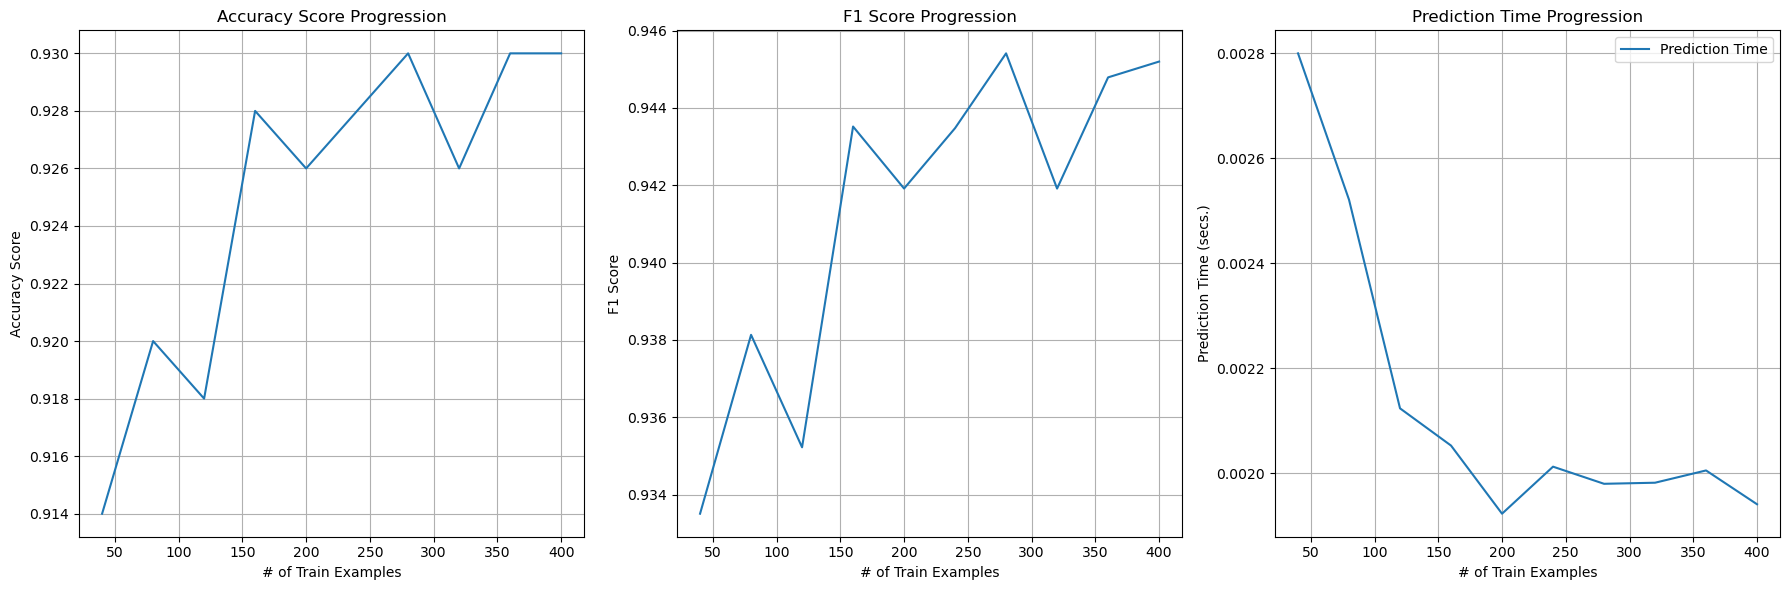

In [48]:
import pandas as pd
import numpy as np
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('/Users/deal/Desktop/BigHW/breast_cancer_ishodnik.csv') # Укажите правильный путь к файлу

# Выбор признаков и целевой переменной
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Определение параметров кросс-валидации
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Инициализация списков для хранения результатов
knn_accuracy_scores = []
knn_f1_scores = []
knn_prediction_times = []
knn_train_sizes = []

# Цикл по различным размерам обучающей выборки
for frac in np.linspace(0.1, 1.0, 10):
    fold_accuracy = []
    fold_f1 = []
    fold_prediction_time = []
    avg_train_size = 0

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Выборка части обучающих данных
        X_train_frac = X_train.sample(frac=frac, random_state=42)
        y_train_frac = y_train.loc[X_train_frac.index]

        # Масштабирование данных
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_frac)
        X_test_scaled = scaler.transform(X_test)

        # Создание и обучение модели k-NN
        knn = KNeighborsClassifier(n_neighbors=14, metric='manhattan')
        start_time = time.time()
        knn.fit(X_train_scaled, y_train_frac)
        predictions = knn.predict(X_test_scaled)
        end_time = time.time()

        # Запись результатов для каждого фолда
        fold_accuracy.append(accuracy_score(y_test, predictions))
        fold_f1.append(f1_score(y_test, predictions))
        fold_prediction_time.append(end_time - start_time)

        avg_train_size += len(X_train_frac)

    # Усреднение результатов по фолдам
    avg_train_size /= n_splits
    knn_train_sizes.append(avg_train_size)
    knn_accuracy_scores.append(np.mean(fold_accuracy))
    knn_f1_scores.append(np.mean(fold_f1))
    knn_prediction_times.append(np.mean(fold_prediction_time))

# Построение графиков
plt.figure(figsize=(18, 6))

# График точности
plt.subplot(1, 3, 1)
plt.plot(knn_train_sizes, knn_accuracy_scores, label='Accuracy')
plt.xlabel('# of Train Examples')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Progression')
plt.grid(True)

# График F1-меры
plt.subplot(1, 3, 2)
plt.plot(knn_train_sizes, knn_f1_scores, label='F1 Score')
plt.xlabel('# of Train Examples')
plt.ylabel('F1 Score')
plt.title('F1 Score Progression')
plt.grid(True)

# График времени предсказания
plt.subplot(1, 3, 3)
plt.plot(knn_train_sizes, knn_prediction_times, label='Prediction Time')
plt.xlabel('# of Train Examples')
plt.ylabel('Prediction Time (secs.)')
plt.title('Prediction Time Progression')
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()


# Бернулевский Naive Bayes


In [37]:
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Загрузка данных
df = pd.read_csv('/Users/deal/Desktop/BigHW/breast_cancer_ishodnik.csv') # Укажите правильный путь к файлу

# Выбор признаков и целевой переменной
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Определение параметров для поиска
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 20,30,100]
}

# Создание модели Бернуллиевского наивного Байеса
bnb = BernoulliNB()

# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=bnb, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)

# Поиск лучших гиперпараметров
grid_search.fit(X, y)

# Вывод лучших параметров
print("Лучшие гиперпараметры:", grid_search.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Лучшие гиперпараметры: {'alpha': 0.01}


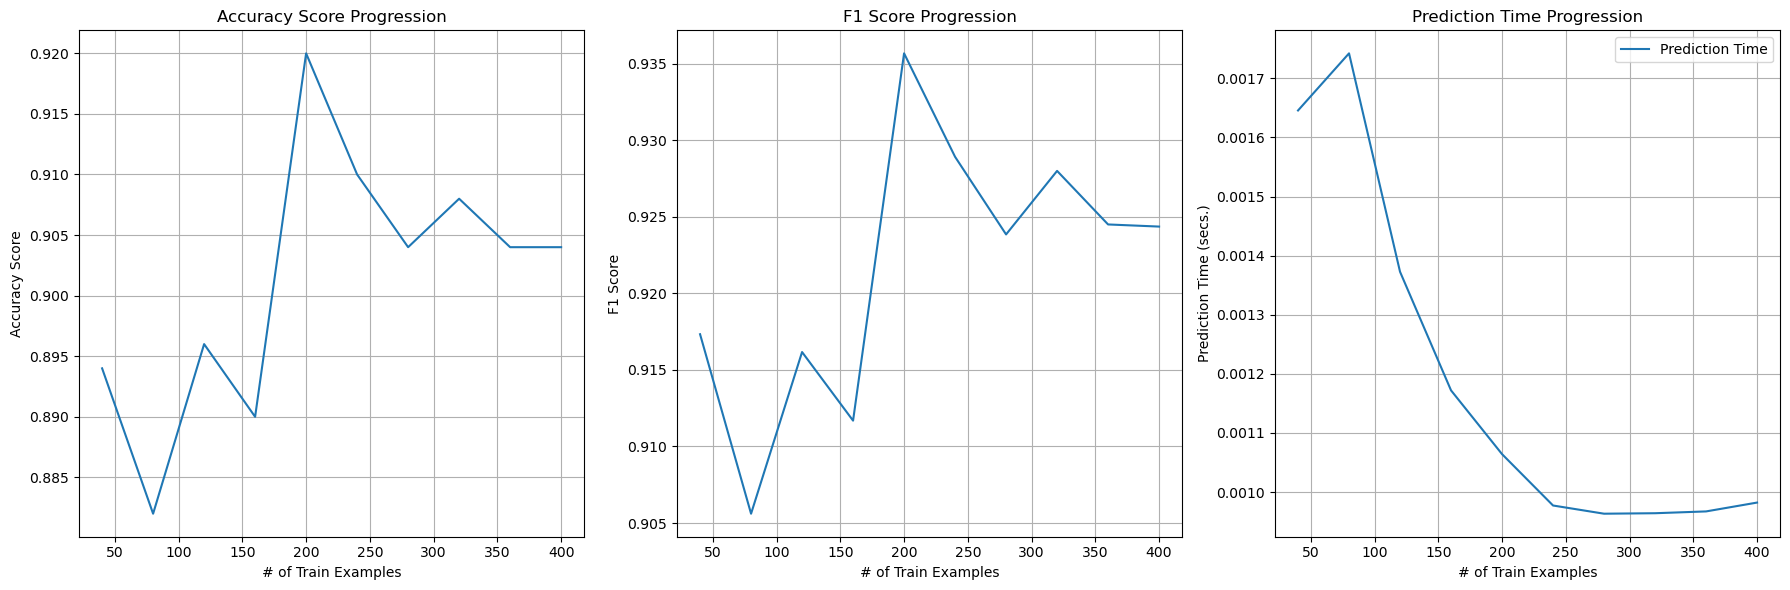

In [39]:
import pandas as pd
import numpy as np
import time
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('/Users/deal/Desktop/BigHW/breast_cancer_binarized.csv') # Укажите правильный путь к файлу

# Выбор признаков и целевой переменной
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Определение параметров кросс-валидации
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Инициализация списков для хранения результатов
bnb_accuracy_scores = []
bnb_f1_scores = []
bnb_prediction_times = []
bnb_train_sizes = []

# Цикл по различным размерам обучающей выборки
for frac in np.linspace(0.1, 1.0, 10):
    fold_accuracy = []
    fold_f1 = []
    fold_prediction_time = []
    avg_train_size = 0

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Выборка части обучающих данных
        X_train_frac = X_train.sample(frac=frac, random_state=42)
        y_train_frac = y_train.loc[X_train_frac.index]

        # Создание и обучение модели Бернуллиевского наивного Байеса
        bnb = BernoulliNB(alpha=0.01)
        start_time = time.time()
        bnb.fit(X_train_frac, y_train_frac)
        predictions = bnb.predict(X_test)
        end_time = time.time()

        # Запись результатов для каждого фолда
        fold_accuracy.append(accuracy_score(y_test, predictions))
        fold_f1.append(f1_score(y_test, predictions))
        fold_prediction_time.append(end_time - start_time)

        avg_train_size += len(X_train_frac)

    # Усреднение результатов по фолдам
    avg_train_size /= n_splits
    bnb_train_sizes.append(avg_train_size)
    bnb_accuracy_scores.append(np.mean(fold_accuracy))
    bnb_f1_scores.append(np.mean(fold_f1))
    bnb_prediction_times.append(np.mean(fold_prediction_time))

# Построение графиков
plt.figure(figsize=(18, 6))

# График точности
plt.subplot(1, 3, 1)
plt.plot(bnb_train_sizes, bnb_accuracy_scores, label='Accuracy')
plt.xlabel('# of Train Examples')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Progression')
plt.grid(True)

# График F1-меры
plt.subplot(1, 3, 2)
plt.plot(bnb_train_sizes, bnb_f1_scores, label='F1 Score')
plt.xlabel('# of Train Examples')
plt.ylabel('F1 Score')
plt.title('F1 Score Progression')
plt.grid(True)

# График времени предсказания
plt.subplot(1, 3, 3)
plt.plot(bnb_train_sizes, bnb_prediction_times, label='Prediction Time')
plt.xlabel('# of Train Examples')
plt.ylabel('Prediction Time (secs.)')
plt.title('Prediction Time Progression')
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()


# регрессия логистическая

In [40]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.pipeline import Pipeline

# Загрузка данных
df = pd.read_csv('/Users/deal/Desktop/BigHW/breast_cancer_ishodnik.csv') # Укажите правильный путь к файлу

# Выбор признаков и целевой переменной
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание конвейера с масштабированием и логистической регрессией
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

# Определение параметров для поиска
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2']
}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)

# Поиск лучших гиперпараметров
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 4

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'logreg__penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [41]:
print("Лучшие гиперпараметры:", grid_search.best_params_)

Лучшие гиперпараметры: {'logreg__C': 100, 'logreg__penalty': 'l2'}


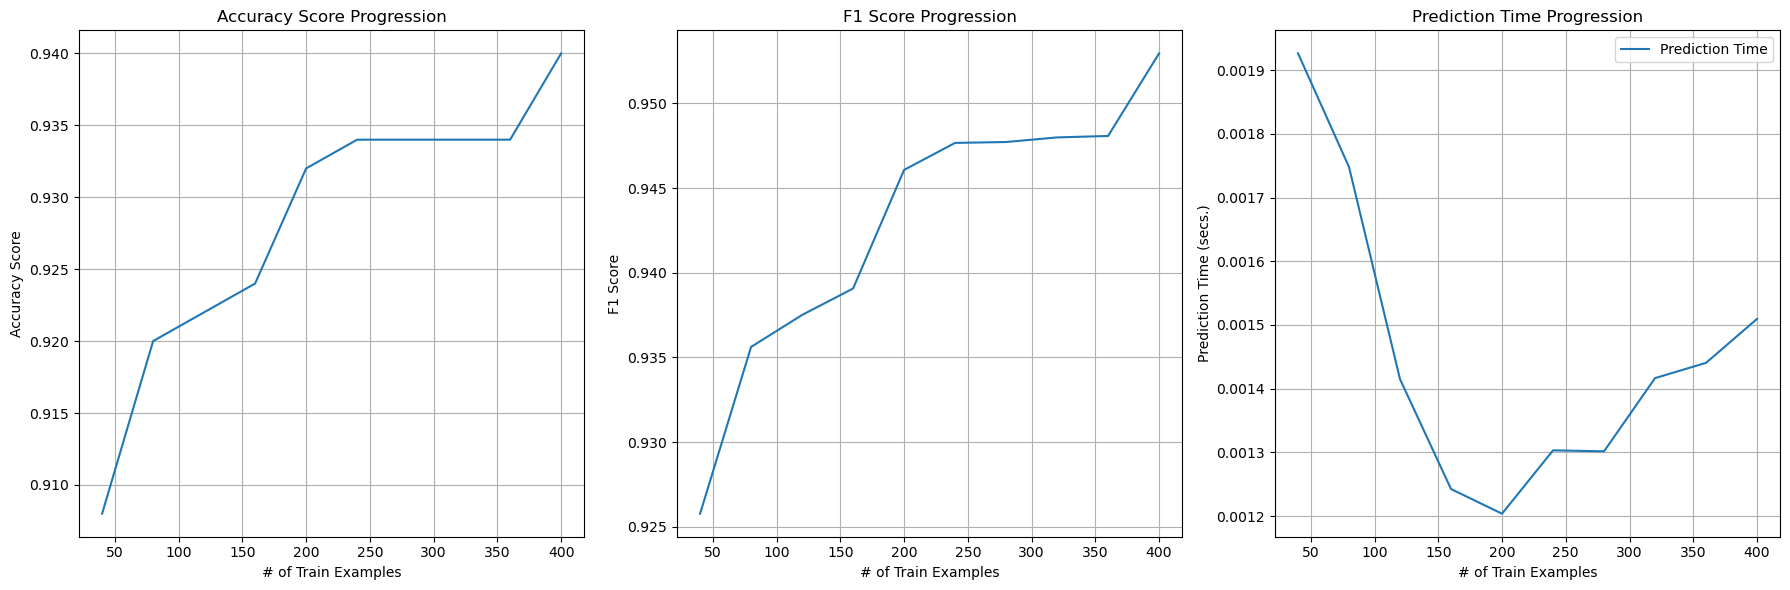

In [42]:
import pandas as pd
import numpy as np
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('/Users/deal/Desktop/BigHW/breast_cancer_ishodnik.csv') # Укажите правильный путь к файлу

# Выбор признаков и целевой переменной
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Определение параметров кросс-валидации
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Инициализация списков для хранения результатов
lr_accuracy_scores = []
lr_f1_scores = []
lr_prediction_times = []
lr_train_sizes = []

# Цикл по различным размерам обучающей выборки
for frac in np.linspace(0.1, 1.0, 10):
    fold_accuracy = []
    fold_f1 = []
    fold_prediction_time = []
    avg_train_size = 0

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Выборка части обучающих данных
        X_train_frac = X_train.sample(frac=frac, random_state=42)
        y_train_frac = y_train.loc[X_train_frac.index]

        # Масштабирование данных
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_frac)
        X_test_scaled = scaler.transform(X_test)

        # Создание и обучение модели логистической регрессии
        logreg = LogisticRegression(C=100, penalty='l2')
        start_time = time.time()
        logreg.fit(X_train_scaled, y_train_frac)
        predictions = logreg.predict(X_test_scaled)
        end_time = time.time()

        # Запись результатов для каждого фолда
        fold_accuracy.append(accuracy_score(y_test, predictions))
        fold_f1.append(f1_score(y_test, predictions))
        fold_prediction_time.append(end_time - start_time)

        avg_train_size += len(X_train_frac)

    # Усреднение результатов по фолдам
    avg_train_size /= n_splits
    lr_train_sizes.append(avg_train_size)
    lr_accuracy_scores.append(np.mean(fold_accuracy))
    lr_f1_scores.append(np.mean(fold_f1))
    lr_prediction_times.append(np.mean(fold_prediction_time))

# Построение графиков
plt.figure(figsize=(18, 6))

# График точности
plt.subplot(1, 3, 1)
plt.plot(lr_train_sizes, lr_accuracy_scores, label='Accuracy')
plt.xlabel('# of Train Examples')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Progression')
plt.grid(True)

# График F1-меры
plt.subplot(1, 3, 2)
plt.plot(lr_train_sizes, lr_f1_scores, label='F1 Score')
plt.xlabel('# of Train Examples')
plt.ylabel('F1 Score')
plt.title('F1 Score Progression')
plt.grid(True)

# График времени предсказания
plt.subplot(1, 3, 3)
plt.plot(lr_train_sizes, lr_prediction_times, label='Prediction Time')
plt.xlabel('# of Train Examples')
plt.ylabel('Prediction Time (secs.)')
plt.title('Prediction Time Progression')
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()


# Итоговые графики

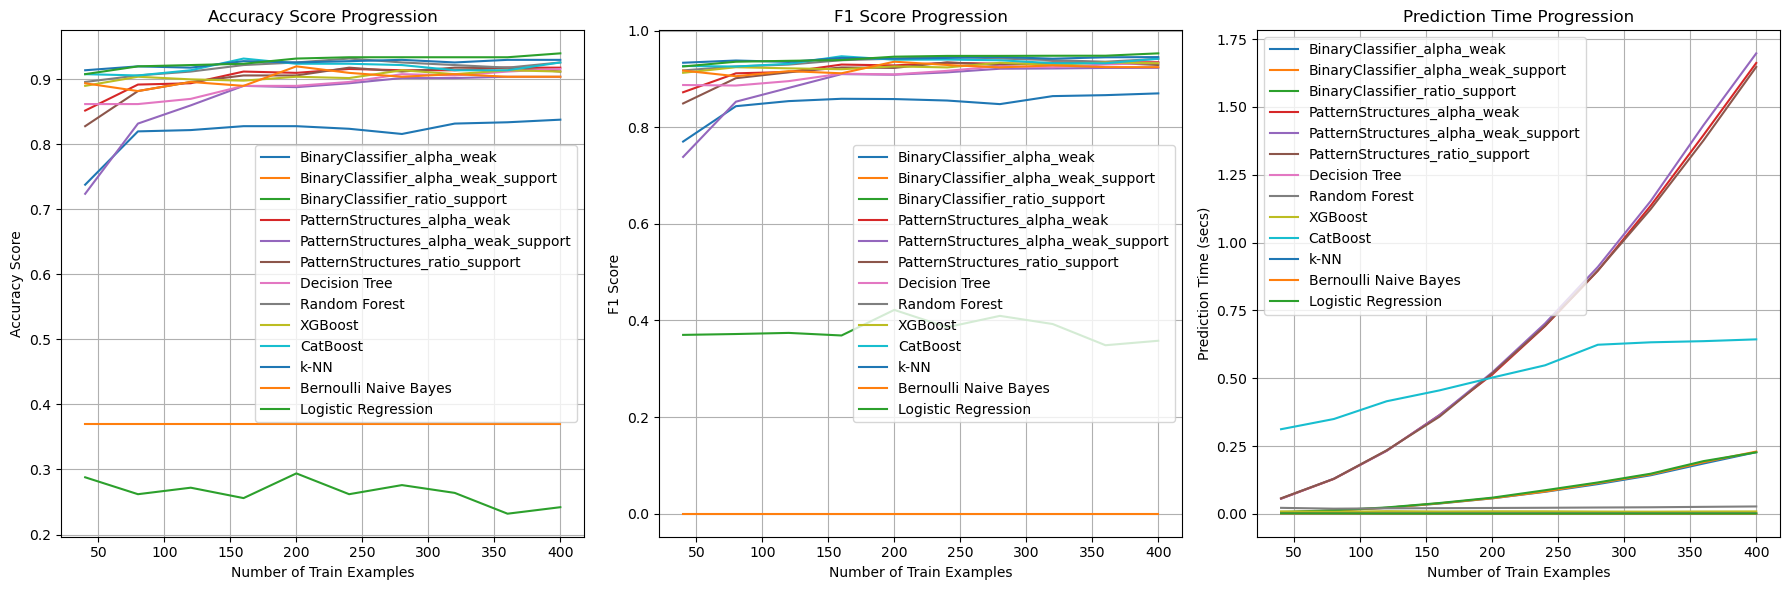

In [49]:
import matplotlib.pyplot as plt

# Создаем фигуру для графиков
plt.figure(figsize=(18, 6))

# Список моделей и их результаты
models = [
    ('BinaryClassifier_alpha_weak', bc_weak_accuracy_scores, bc_weak_f1_scores, bc_weak_prediction_times, bc_weak_train_sizes),
    ('BinaryClassifier_alpha_weak_support', bc_sup_accuracy_scores, bc_sup_f1_scores, bc_sup_prediction_times, bc_sup_train_sizes),
    ('BinaryClassifier_ratio_support', bc_rat_accuracy_scores, bc_rat_f1_scores, bc_rat_prediction_times, bc_rat_train_sizes),
    ('PatternStructures_alpha_weak', ps_weak_accuracy_scores, ps_weak_f1_scores, ps_weak_prediction_times, ps_weak_train_sizes),
    ('PatternStructures_alpha_weak_support', ps_sup_accuracy_scores, ps_sup_f1_scores, ps_sup_prediction_times, ps_sup_train_sizes),
    ('PatternStructures_ratio_support', ps_rat_accuracy_scores, ps_rat_f1_scores, ps_rat_prediction_times, ps_rat_train_sizes),
    ('Decision Tree', dt_accuracy_scores, dt_f1_scores, dt_prediction_times, dt_train_sizes),
    ('Random Forest', rf_accuracy_scores, rf_f1_scores, rf_prediction_times, rf_train_sizes),
    ('XGBoost', xgb_accuracy_scores, xgb_f1_scores, xgb_prediction_times, xgb_train_sizes),
    ('CatBoost', cb_accuracy_scores, cb_f1_scores, cb_prediction_times, cb_train_sizes),
    ('k-NN', knn_accuracy_scores, knn_f1_scores, knn_prediction_times, knn_train_sizes),
    ('Bernoulli Naive Bayes', bnb_accuracy_scores, bnb_f1_scores, bnb_prediction_times, bnb_train_sizes),
    ('Logistic Regression', lr_accuracy_scores, lr_f1_scores, lr_prediction_times, lr_train_sizes)
]

# График точности
plt.subplot(1, 3, 1)
for model_name, acc_scores, _, _, train_sizes in models:
    plt.plot(train_sizes, acc_scores, label=model_name)
plt.title('Accuracy Score Progression')
plt.xlabel('Number of Train Examples')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.legend()

# График F1-меры
plt.subplot(1, 3, 2)
for model_name, _, f1_scores, _, train_sizes in models:
    plt.plot(train_sizes, f1_scores, label=model_name)
plt.title('F1 Score Progression')
plt.xlabel('Number of Train Examples')
plt.ylabel('F1 Score')
plt.grid(True)
plt.legend()

# График времени предсказания
plt.subplot(1, 3, 3)
for model_name, _, _, pred_times, train_sizes in models:
    plt.plot(train_sizes, pred_times, label=model_name)
plt.title('Prediction Time Progression')
plt.xlabel('Number of Train Examples')
plt.ylabel('Prediction Time (secs)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

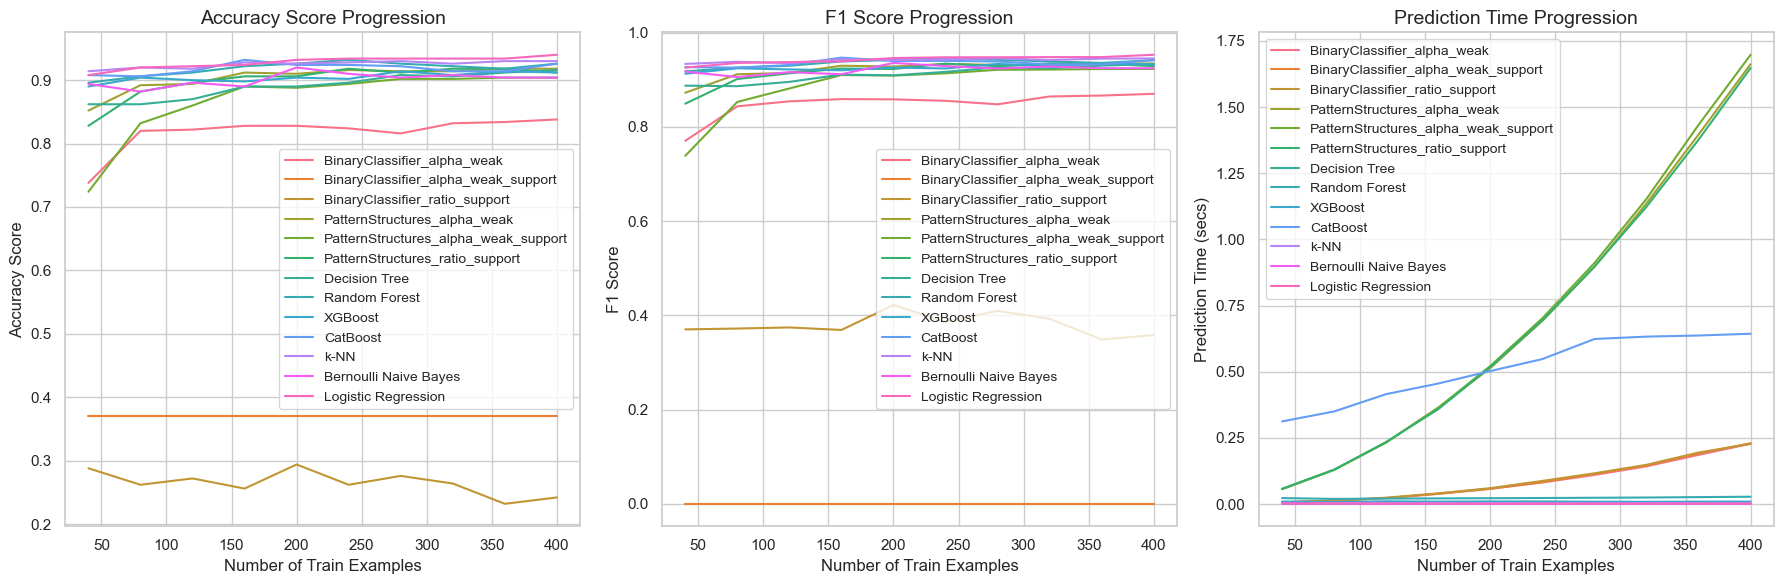

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем стиль и цветовую палитру
sns.set(style="whitegrid")
palette = sns.color_palette("husl", len(models))  # Разноцветная палитра для моделей

# Создаем фигуру для графиков
plt.figure(figsize=(18, 6))

# График точности
plt.subplot(1, 3, 1)
for i, (model_name, acc_scores, _, _, train_sizes) in enumerate(models):
    plt.plot(train_sizes, acc_scores, label=model_name, color=palette[i])
plt.title('Accuracy Score Progression', fontsize=14)
plt.xlabel('Number of Train Examples', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.legend(fontsize=10)

# График F1-меры
plt.subplot(1, 3, 2)
for i, (model_name, _, f1_scores, _, train_sizes) in enumerate(models):
    plt.plot(train_sizes, f1_scores, label=model_name, color=palette[i])
plt.title('F1 Score Progression', fontsize=14)
plt.xlabel('Number of Train Examples', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.legend(fontsize=10)

# График времени предсказания
plt.subplot(1, 3, 3)
for i, (model_name, _, _, pred_times, train_sizes) in enumerate(models):
    plt.plot(train_sizes, pred_times, label=model_name, color=palette[i])
plt.title('Prediction Time Progression', fontsize=14)
plt.xlabel('Number of Train Examples', fontsize=12)
plt.ylabel('Prediction Time (secs)', fontsize=12)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()